Name: Guneykan Ozgul

I hereby declare that I observed the honour code of the university when preparing the homework.

## Solution to 16.3-5 and 18
## 18.1


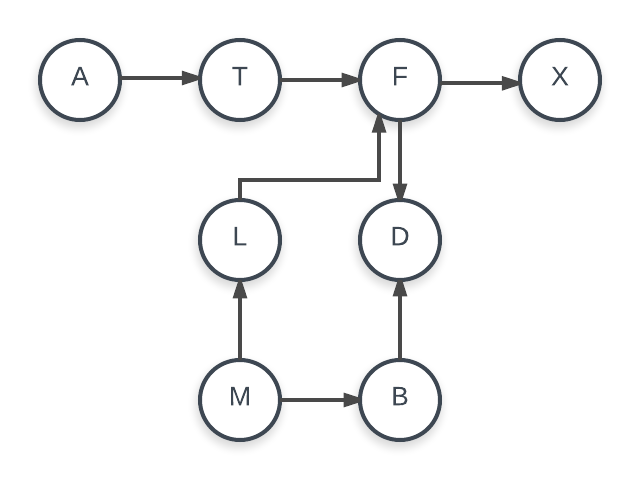

In [52]:
from IPython.display import Image as im
Image("graph1.png",width=300)

## 18.2

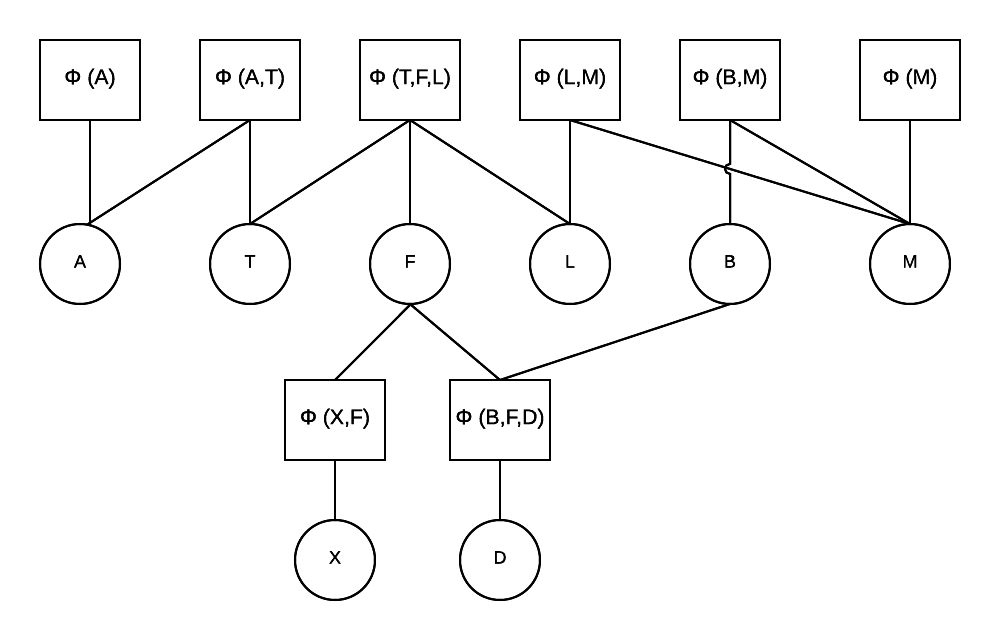

In [58]:
from IPython.display import Image as im
Image("graph2.png",width=500)

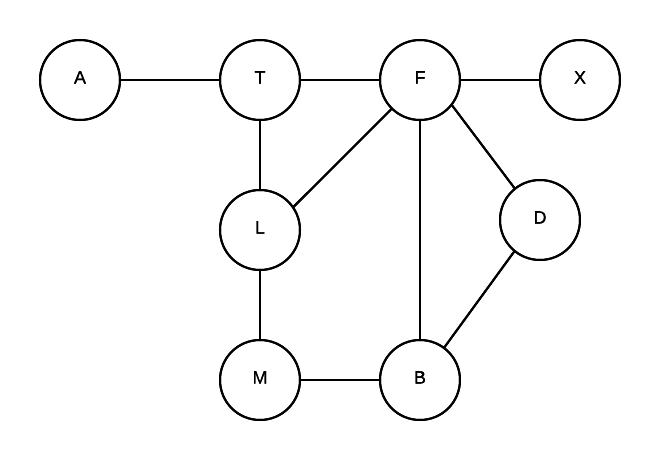

In [59]:
from IPython.display import Image as im
Image("graph3.png",width=300)

## 18.3 

$p(F|T,L)\rightarrow (N-1)\dot N^2$

$p(M)\rightarrow (N-1)$

$p(T|A)\rightarrow N\cdot(N-1)$

$p(B|M)\rightarrow  N\cdot(N-1)$

$p(X|F)\rightarrow  N\cdot(N-1)$

$p(L|M)\rightarrow  N\cdot(N-1)$

$p(D|F,B)\rightarrow (N-1)\dot N^2$

$p(A)\rightarrow (N-1)$

$S=(N-1)\dot N^2+(N-1)+ N\cdot(N-1)+N\cdot(N-1)+N\cdot(N-1)+ N\cdot(N-1)+(N-1)\dot N^2+(N-1)$

$S=2N^3+2N^2-2N-2$

## 18.4

a) There is an head-to-head collision on F between A and M. Since F is not given (or not child of any given element) the path is blocked. So A and M are d-seperated. Therefore the statement is true. 

b) Again there is an head-to-head collision on F between A-M. X is given and child of F so the path is not blocked. Therefore A and M are not d-seperated. The statement is false. 

c) There is an head-to-head collision on F between T and L. X is child of F so T and L are not d-seperated. The statement is false.

d) There is an head-to-tail collision on F. F is given so the path is blocked. L and X are d-seperated. The statement is true.

e) There is an head-to-tail collision on F. F is not given so the path is not blocked. L and X are not d-seperated. The statement is false.

## Programming Homework 3

In this exercise we model a string of text using a Markov(1) model. For simplicity we only consider letters 'a-z'. Capital letters 'A-Z' are mapped to the corresponding ones. All remaining letters, symbols, numbers, including spaces, are denoted by '.'.


We have a probability table $T$ where $T_{i,j} = p(x_t = j | x_{t-1} = i)$  transition model of letters in English text for $t=1,2 \dots N$. Assume that the initial letter in a string is always a space denoted as $x_0 = \text{'.'}$. Such a model where the probability table is always the same is sometimes called a stationary model.

1. For a given $N$, write a program to sample random strings with letters $x_1, x_2, \dots, x_N$ from $p(x_{1:N}|x_0)$
1. Now suppose you are given strings with missing letters, where each missing letter is denoted by a question mark (or underscore, as below). Implement a method, that samples missing letters conditioned on observed ones, i.e., samples from $p(x_{-\alpha}|x_{\alpha})$ where $\alpha$ denotes indices of observed letters. For example, if the input is 't??.', we have $N=4$ and
$x_1 = \text{'t'}$ and $x_4 = \text{'.'}$, $\alpha=\{1,4\}$ and $-\alpha=\{2,3\}$. Your program may possibly generate the strings 'the.', 'twi.', 'tee.', etc. Hint: make sure to make use all data given and sample from the correct distribution. Implement the method and print the results for the test strings below. 
1. Describe a method for filling in the gaps by estimating the most likely letter for each position. Hint: you need to compute
$$
x_{-\alpha}^* = \arg\max_{x_{-\alpha}} p(x_{-\alpha}|x_{\alpha})
$$
Implement the method and print the results for the following test strings along with the log-probability  $\log p(x_{-\alpha}^*,x_{\alpha})$.
1. Discuss how you can improve the model to get better estimations.

In [ ]:
test_strings = ['th__br__n.f_x.', '_u_st__n_.to_be._nsw_r__','i__at_._a_h_n_._e_r_i_g','q___t.___z._____t.__.___.__.']

Hint: The code below loads a table of transition probabilities for English text.

In [2]:
import csv
from IPython.display import display, Latex

alphabet = [chr(i+ord('a')) for i in range(26)]
alphabet.append('.')
letter2idx = {c:i for i,c in enumerate(alphabet)}

T = []
with open('transitions.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        T.append(row)

print('Example')
## p(x_t = 'u' | x_{t-1} = 'q')
display(Latex(r"$p(x_t = \text{'u'} | x_{t-1} = \text{'q'})$"))
print(T[letter2idx['q']][letter2idx['u']])
display(Latex(r"$p(x_t | x_{t-1} = \text{'a'})$"))
for c,p in zip(alphabet,T[letter2idx['a']]):
    print(c,p)

Example


<IPython.core.display.Latex object>

0.9949749


<IPython.core.display.Latex object>

a 0.0002835
b 0.0228302
c 0.0369041
d 0.0426290
e 0.0012216
f 0.0075739
g 0.0171385
h 0.0014659
i 0.0372661
j 0.0002353
k 0.0110124
l 0.0778259
m 0.0260757
n 0.2145354
o 0.0005459
p 0.0195213
q 0.0001749
r 0.1104770
s 0.0934290
t 0.1317960
u 0.0098029
v 0.0306574
w 0.0088799
x 0.0009562
y 0.0233701
z 0.0018701
. 0.0715219


### TASK 1

In [5]:
import numpy as np
from random import randint
N=10
letters=[]
letters.append('.');
for i in range (0,N):
    prev=letters[i]
    prev_id=letter2idx[prev]
    column=T[:][prev_id]
    probs=np.array([float(j) for j in column])
    probs /= probs.sum()
    c=np.random.choice(alphabet,p=probs)
    letters.append(c)
str=""
for j in letters[1:]:
    str+=j
print(str)  

amay.ofigh


To increase efficency of the program, contigous blocks of missing letters can be calculated seperately. For instance if the word is 'th??br??n', first two missing letters can be estimated first, and then second missing two letters can be estimated later. This can be calculated because two first letters depend only on 'h' and 'b' letters and second two letters are dependent on 'r' and 'n'.

In [71]:
import itertools as it
test_strings = ['th__br__n.f_x.', '_u_st__n_.to_be._nsw_r__','i__at_._a_h_n_._e_r_i_g','q___t.___z._____t.__.___.__.']

def fill_letters(string):
    string+='.'
    charList=list(string)
    unknown=[]
    sum_terms=[]
    N=len(string)
    for ch in range (0,N):
            current=string[ch]
            if current=='?' or current=='_':
                unknown.append(ch)
    #print(unknown)
    for i in range(0,len(unknown)):
        temp=[]
        if i==0:
            temp.append(unknown[i])
            sum_terms.append(temp)
        elif unknown[i]-unknown[i-1]==1:
            sum_terms[len(sum_terms)-1].append(unknown[i])
        else :
            temp.append(unknown[i])
            sum_terms.append(temp)

    sum_terms_probs=[]     
    #print(sum_terms)            
    sum=0
    for i in range(0,len(sum_terms)):
            tm=list(it.product(alphabet,repeat=len(sum_terms[i])))
            tm_probs=[]
            prev=string[sum_terms[i][0]-1]
            nexti=string[sum_terms[i][len(sum_terms[i])-1]+1]
            previd=letter2idx[prev]
            nextid=letter2idx[nexti]
            for est in range(0,len(tm)):
                val=1
                firstid=letter2idx[tm[est][0]]
                lastid=letter2idx[tm[est][len(tm[est])-1]]
                for est2 in range(1,len(tm[est])):
                    id1=letter2idx[tm[est][est2-1]]
                    id2=letter2idx[tm[est][est2]]   
                    val*=float(T[id1][id2])
                val*=float(T[previd][firstid])*float(T[lastid][nextid])
                tm_probs.append(val) 
            tm_probs=np.array(tm_probs)
            tm_probs/=tm_probs.sum()
            tm_probs=list(tm_probs)
            final=np.random.choice(np.arange(0,27**len(sum_terms[i])),p=tm_probs)
            tm_probs=[]
            for t in range(0,len(sum_terms[i])):
                charList[sum_terms[i][t]]=tm[final][t]
           # print(tm[final])
    return charList

for mystr in test_strings:
    charList=fill_letters('.'+mystr+'.')
    print(''.join(charList[1:len(charList)-2]))


the.brken.fex.
bunstyone.toube.answarey
iomath.rathinn.hegr.ing
qurut.m.az.phas.t.he.aby.pr.


In [15]:
import itertools as it
test_strings = ['th__br__n.f_x.', '_u_st__n_.to_be._nsw_r__','i__at_._a_h_n_._e_r_i_g','q___t.___z._____t.__.___.__.']
def fill_letters(string):
    log_probs=[]
    string+='.'
    charList=list(string)
    unknown=[]
    sum_terms=[]
    N=len(string)
    for ch in range (0,N):
            current=string[ch]
            if current=='?' or current=='_':
                unknown.append(ch)
    #print(unknown)
    for i in range(0,len(unknown)):
        temp=[]
        if i==0:
            temp.append(unknown[i])
            sum_terms.append(temp)
        elif unknown[i]-unknown[i-1]==1:
            sum_terms[len(sum_terms)-1].append(unknown[i])
        else :
            temp.append(unknown[i])
            sum_terms.append(temp)

    sum_terms_probs=[]     
    #print(sum_terms)            
    sum=0
    for i in range(0,len(sum_terms)):
            tm=list(it.product(alphabet,repeat=len(sum_terms[i])))
            tm_probs=[]
            prev=string[sum_terms[i][0]-1]
            nexti=string[sum_terms[i][len(sum_terms[i])-1]+1]
            previd=letter2idx[prev]
            nextid=letter2idx[nexti]
            for est in range(0,len(tm)):
                val=1
                firstid=letter2idx[tm[est][0]]
                lastid=letter2idx[tm[est][len(tm[est])-1]]
                for est2 in range(1,len(tm[est])):
                    id1=letter2idx[tm[est][est2-1]]
                    id2=letter2idx[tm[est][est2]]   
                    val*=float(T[id1][id2])
                val*=float(T[previd][firstid])*float(T[lastid][nextid])
                tm_probs.append(val) 
            tm_probs=np.array(tm_probs)
            tm_probs/=tm_probs.sum()
            tm_probs=list(tm_probs)
            final=tm_probs.index(np.max(tm_probs))
            log_probs.append(np.log(np.max(tm_probs)))    
            tm_probs=[]
            for t in range(0,len(sum_terms[i])):
                charList[sum_terms[i][t]]=tm[final][t]
           # print(tm[final])
    return charList,log_probs

for mystr in test_strings:
    charList,logprobs=fill_letters('.'+mystr+'.')
    logprobs=np.array(logprobs)
    maxp=logprobs.sum()
    print(''.join(charList[1:len(charList)-2]))
    print ("Max Log2 Probability: " , maxp)
    

the.br.an.fex.
Max Log2 Probability:  -3.07433486577
oursthend.to.be.answered
Max Log2 Probability:  -11.0693279723
in.ath.wathend.he.r.ing
Max Log2 Probability:  -11.636089996
qus.t.herz.thed.t.he.the.he.
Max Log2 Probability:  -21.1402671647


## Task 4
In reality letters do not only depend on one previous letter, but two or three previous letters. Therefore instead of Markov 1 we can use Markov 3.  